## Titanic Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## 1 - Data preprocessing

In [11]:
df_titanic1 = pd.read_csv('train.csv')

In [12]:
df_titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_titanic1.shape

(891, 12)

In [14]:
df_titanic2 = pd.read_csv('test.csv')

In [15]:
df_titanic2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df_titanic2.shape

(418, 11)

In [17]:
df_y = pd.read_csv('titanic-y.csv',sep=';')

In [18]:
df_y.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [19]:
df_y.shape

(1309, 2)

In [20]:
len(df_y.PassengerId.unique())

1309

In [21]:
df_titanic1.drop(columns = ['Survived'], inplace =True)

In [22]:
df_titanic = pd.concat([df_titanic1, df_titanic2])
df_titanic.set_index(['PassengerId'], inplace=True)

In [23]:
df_titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df_titanic.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df_titanic.shape

(1309, 10)

In [26]:
df_titanic.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [27]:
df_titanic.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### 1.1 - Valores categóricos

In [28]:
df_titanic.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### 1.2 -  Valores nulos

In [29]:
df_titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [30]:
edad = df_titanic['Age'].value_counts(ascending=False)

In [31]:
edad.head(10)

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
25.0    34
28.0    32
36.0    31
26.0    30
29.0    30
Name: Age, dtype: int64

/Users/xavieraage/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

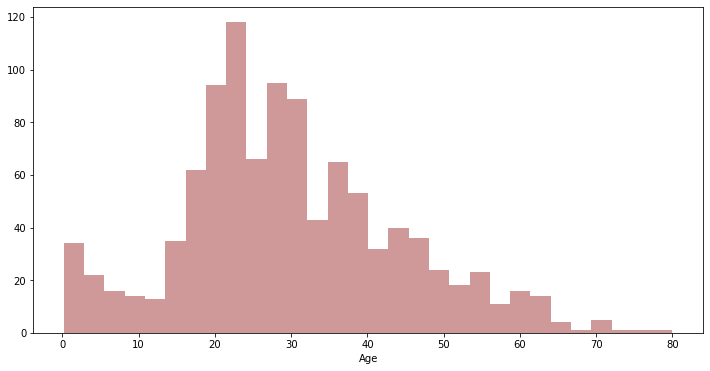

In [32]:
plt.figure(figsize=(12,6))
sns.distplot(df_titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

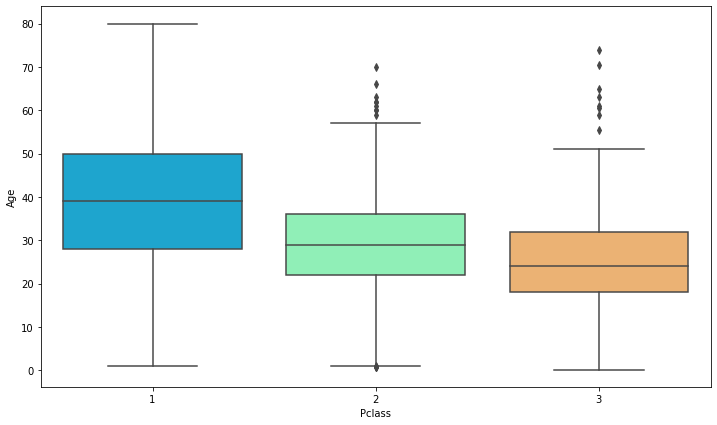

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_titanic,palette='rainbow')

In [34]:
df_titanic.iloc[5]

Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

In [35]:
lista_edad = []

for i in range(len(df_titanic)):
    if pd.isnull(df_titanic.iloc[i]['Age']):
        if df_titanic.iloc[i]['Pclass'] == 1:
            lista_edad.append(39)
        elif df_titanic.iloc[i]['Pclass'] == 2:
            lista_edad.append(29)
        else:
            lista_edad.append(25)
    else:
        lista_edad.append(df_titanic.iloc[i]['Age'])
        
df_titanic['Age'] = lista_edad        
            

In [36]:
df_titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [37]:
df_titanic[df_titanic['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [38]:
df_titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [39]:
df_titanic['Embarked']=df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

In [40]:
df_titanic['Fare'].mean()

33.2954792813456

In [41]:
df_titanic['Fare']=df_titanic['Fare'].fillna(df_titanic['Fare'].mean())

In [42]:
df_titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

### 1.3 - Nombres repetidos

In [43]:
df_titanic['Name'].value_counts()

Kelly, Mr. James                                   2
Connolly, Miss. Kate                               2
Hart, Mr. Benjamin                                 1
Keane, Mr. Andrew "Andy"                           1
Cor, Mr. Liudevit                                  1
                                                  ..
Louch, Mr. Charles Alexander                       1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
Sandstrom, Miss. Beatrice Irene                    1
Smith, Mr. Lucien Philip                           1
Salomon, Mr. Abraham L                             1
Name: Name, Length: 1307, dtype: int64

In [44]:
len(list(df_titanic['Name'].unique()))
len(df_titanic['Name'])
df_titanic['Name'][df_titanic['Name'].duplicated() == True]
print(df_titanic[df_titanic['Name'] == 'Kelly, Mr. James'])
print(df_titanic[df_titanic['Name'] == 'Connolly, Miss. Kate'])

             Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
PassengerId                                                               
697               3  Kelly, Mr. James  male  44.0      0      0  363592   
892               3  Kelly, Mr. James  male  34.5      0      0  330911   

               Fare Cabin Embarked  
PassengerId                         
697          8.0500   NaN        S  
892          7.8292   NaN        Q  
             Pclass                  Name     Sex   Age  SibSp  Parch  Ticket  \
PassengerId                                                                     
290               3  Connolly, Miss. Kate  female  22.0      0      0  370373   
898               3  Connolly, Miss. Kate  female  30.0      0      0  330972   

               Fare Cabin Embarked  
PassengerId                         
290          7.7500   NaN        Q  
898          7.6292   NaN        Q  


In [45]:
len(df_titanic['Name'].unique())

1307

### 1.4 - Crear variables nuevas

In [46]:
df_titanic['Title'] = df_titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [47]:
df_titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [48]:
df_titanic.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Countess      1
Sir           1
Jonkheer      1
Capt          1
Lady          1
Don           1
Mme           1
Dona          1
Name: Title, dtype: int64

In [49]:
df_titanic['Title'] = df_titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_titanic['Title'] = df_titanic['Title'].replace('Mlle', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Ms', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Mme', 'Mrs')

In [50]:
df_titanic.drop(columns = ['Name'], inplace=True)

### 1.5 - Valores únicos

In [51]:
for j in df_titanic.columns:
    print(j)
    print(df_titanic[j].value_counts())

Pclass
3    709
1    323
2    277
Name: Pclass, dtype: int64
Sex
male      843
female    466
Name: Sex, dtype: int64
Age
25.00    242
39.00     59
24.00     47
29.00     46
22.00     43
        ... 
22.50      1
74.00      1
24.50      1
80.00      1
0.67       1
Name: Age, Length: 98, dtype: int64
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64
Ticket
CA. 2343    11
1601         8
CA 2144      8
347082       7
PC 17608     7
            ..
364846       1
366713       1
693          1
330924       1
110564       1
Name: Ticket, Length: 929, dtype: int64
Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
8.0292      1
12.7375     1
8.6542      1
34.0208     1
7.1417      1
Name: Fare, Length: 282, dtype: int64
Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2             

### 1.6 - Variables categóricas

In [52]:
df_titanic.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Title        object
dtype: object

In [53]:
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [54]:
df_titanic['Sex'] = df_titanic['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [55]:
# borramos variable ticket
df_titanic.drop('Ticket', axis=1, inplace=True)

In [56]:
len(df_titanic['Cabin'].unique())

187

In [57]:
df_titanic['Cabin'].isnull().sum()

1014

In [58]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [59]:
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [60]:
df_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,Mr
2,1,1,38.0,1,0,71.2833,C,Mrs
3,3,1,26.0,0,0,7.9250,S,Miss
4,1,1,35.0,1,0,53.1000,S,Mrs
5,3,0,35.0,0,0,8.0500,S,Mr


In [61]:
embarked = pd.get_dummies(df_titanic['Embarked'])

In [62]:
embarked?

In [63]:
embarked.head()

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [64]:
df_titanic.insert(8,'Cherbourg',embarked['C'])
df_titanic.insert(9,'Queenstown',embarked['Q'])
df_titanic.insert(10,'Southampton',embarked['S'])

In [65]:
df_titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [66]:
# Encode target labels with value between 0 and n_classes-1
transform1 = LabelEncoder()
transform1.fit_transform(['Q','C','S'])
print(transform1.classes_)
print(transform1.transform(df_titanic['Embarked']))

prueba = transform1.transform(df_titanic['Embarked'])

['C' 'Q' 'S']
[2 0 2 ... 2 2 0]


In [50]:
# Encode categorical features as a one-hot numeric array
transform2 = OneHotEncoder() 
transform2.fit_transform(prueba.reshape(len(prueba), 1)).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [95]:
df_titanic.drop('Embarked', axis=1, inplace=True)

In [96]:
mapeo = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_titanic['Title'] = df_titanic['Title'].map(mapeo)

In [97]:
df_titanic.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Cherbourg      0
Queenstown     0
Southampton    0
dtype: int64

In [98]:
df_titanic.dtypes

Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Title            int64
Cherbourg        uint8
Queenstown       uint8
Southampton      uint8
dtype: object

## 2 - Train-Test

In [99]:
titanic_y = pd.read_csv('titanic-y.csv',sep = ';')

In [100]:
titanic_y.set_index('PassengerId', inplace=True)

In [101]:
titanic_y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [102]:
titanic_y.Survived.unique()

array([0, 1], dtype=int64)

In [109]:
 X_train, X_test, y_train, y_test = train_test_split( df_titanic,
                        titanic_y,
                        test_size=0.3,
                        random_state=42,
                        stratify = titanic_y)

In [110]:
len(X_train)

916

In [111]:
len(X_test)

393

In [112]:
len(y_train)

916

In [113]:
len(y_test)

393

In [114]:
traindf = pd.concat([X_train,y_train], axis=1)

In [115]:
traindf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cherbourg,Queenstown,Southampton,Survived
PassengerId,,,,,,,,,,,
494,1,0,71.0,0,0,49.5042,1,1,0,0,0
462,3,0,34.0,0,0,8.0500,1,0,0,1,0
1286,3,0,29.0,3,1,22.0250,1,0,0,1,0
1130,2,1,18.0,1,1,13.0000,2,0,0,1,1
461,1,0,48.0,0,0,26.5500,1,0,0,1,1


In [66]:
testdf = X_test

### 2.1 - Correlación de variables

C:\Users\cx02202\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


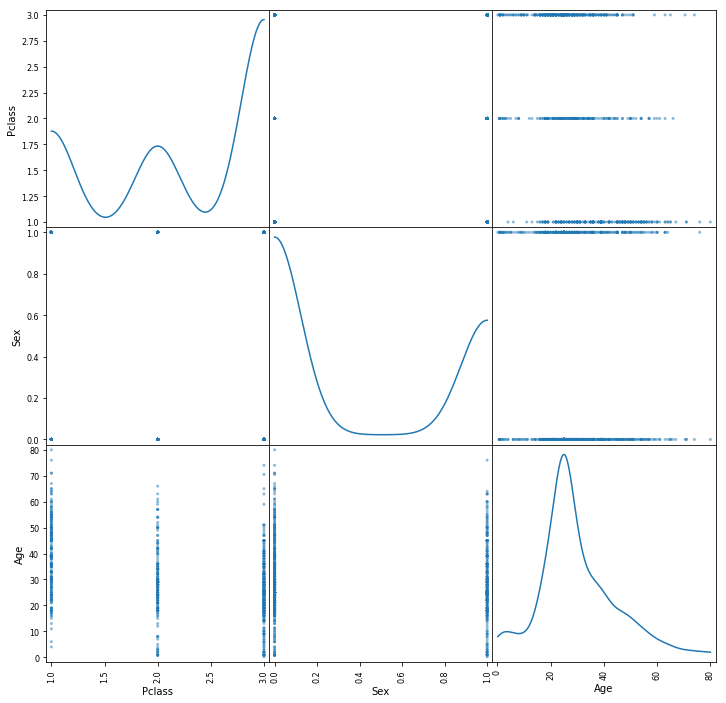

In [116]:
features = ['Pclass','Sex','Age']
from pandas.tools.plotting import scatter_matrix

scatter_matrix(traindf[features], figsize = (12, 12), diagonal = 'kde');

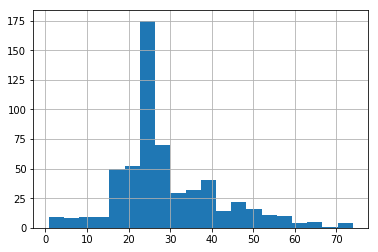

In [117]:
traindf['Age'][traindf['Survived']==0].hist(bins=20)

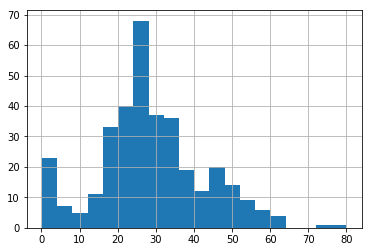

In [118]:
traindf['Age'][traindf['Survived']==1].hist(bins=20)

### 2.2 - Escalado de Características

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
prueba_escalado = sc.fit_transform(X_train)

In [71]:
prueba_escalado[0]

array([ 0.83946169, -0.74857042,  0.20352157, -0.47350156, -0.42482001,
       -0.47346752, -0.71760571, -0.49940298, -0.32495634,  0.64706969])

Podemos normalizar o estandarizar - con esto conseguimos que ninguna variable domine sobre otra:

- Estandarizar =  ( x – media(x) ) / desviación típica(x)
- Normalizar = (x-min(x) / max-min(x))



### 2.3 - Detección outliers

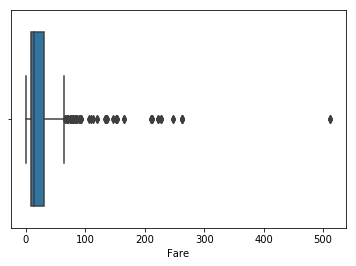

In [72]:
sns.boxplot(x=X_train['Fare'])

In [73]:
X_train[X_train['Fare'] > 262]

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,
1267,1,1,45.0,0,0,262.3750,2,1,0,0
1034,1,0,61.0,1,3,262.3750,1,1,0,0
945,1,1,28.0,3,2,263.0000,2,0,0,1
956,1,0,13.0,2,2,262.3750,4,1,0,0
1235,1,1,58.0,0,1,512.3292,3,1,0,0
743,1,1,21.0,2,2,262.3750,2,1,0,0
680,1,0,36.0,0,1,512.3292,1,1,0,0
312,1,1,18.0,2,2,262.3750,2,1,0,0
738,1,0,35.0,0,0,512.3292,1,1,0,0


### 2.4 -  Z_score para corregir los outliers

In [74]:
z = np.abs(stats.zscore(X_train['Fare']))
print(z)

[0.47346752 2.45248078 0.1861282  ... 0.48380801 0.0639157  0.47634465]


In [75]:
threshold = 3
print(np.where(z > 3))

(array([   7,    8,   35,  127,  183,  184,  199,  219,  271,  274,  328,
        329,  420,  508,  535,  684,  725,  726,  741,  771,  786,  790,
        793,  829,  837,  862,  873,  926,  952, 1004, 1030, 1043],
      dtype=int64),)


In [76]:
X_train.reset_index().iloc[7]

PassengerId    1267.000
Pclass            1.000
Sex               1.000
Age              45.000
SibSp             0.000
Parch             0.000
Fare            262.375
Title             2.000
Cherbourg         1.000
Queenstown        0.000
Southampton       0.000
Name: 7, dtype: float64